<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/OpenActTextDev/ActuarialRegression/blob/main/Notebooks/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>


# MNIST

*Credits:*
Much of the MNIST code employed here comes
[Géron (2023). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow (3rd ed.). O'Reilly Media.](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).

*  Specifically, in our
[Big Data, Dimension Reduction, and Non-Supervised Learning](https://nbviewer.org/github/OpenActTextDev/ActuarialRegression/blob/main/Notebooks/BigDataDimReduction.ipynb) module, we used a bit of [Géron, Chapter 8](https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb).

*  Below is a review of some of the ideas we have already seen in our **classification** module.  This code was drawn from [Géron, Chapter 3](https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb).

*  You may wish to skip ahead to the section that shows how to use deep learning and convolution networks on the MNIST data. This code is largely drawn from [Géron, Chapter 14, Exercise 9](https://github.com/ageron/handson-ml3/blob/main/14_deep_computer_vision_with_cnns.ipynb).

You may also wish to check out

*  [Dani Bauer's Image Classification Lab](https://github.com/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning/blob/main/GB888_VI_4_ImageClassificationLab.ipynb) and
*  [Patrick Laub's Computer Vision Tutorial](https://laub.au/DeepLearningForActuaries/Computer-Vision/computer-vision.html)

**Set Up**

As is the custom with Jupyter notebooks, we start by loading the libraries that are going to be helpful.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # extra code – for the curved arrow
import pandas as pd
import seaborn as sns
import random

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical

#  Retrieving the Data

In [ ]:
#from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [ ]:
# extra code – it's a bit too long
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

In [ ]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape

(70000,)

In [ ]:
28 * 28

784

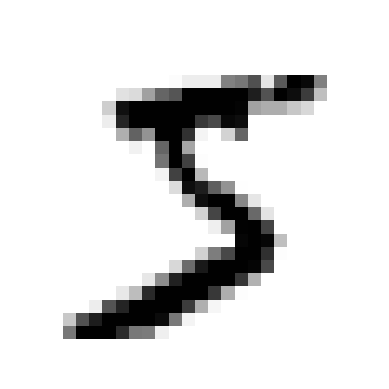

In [ ]:
#import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)

plt.show()

In [ ]:
y[0]

'5'

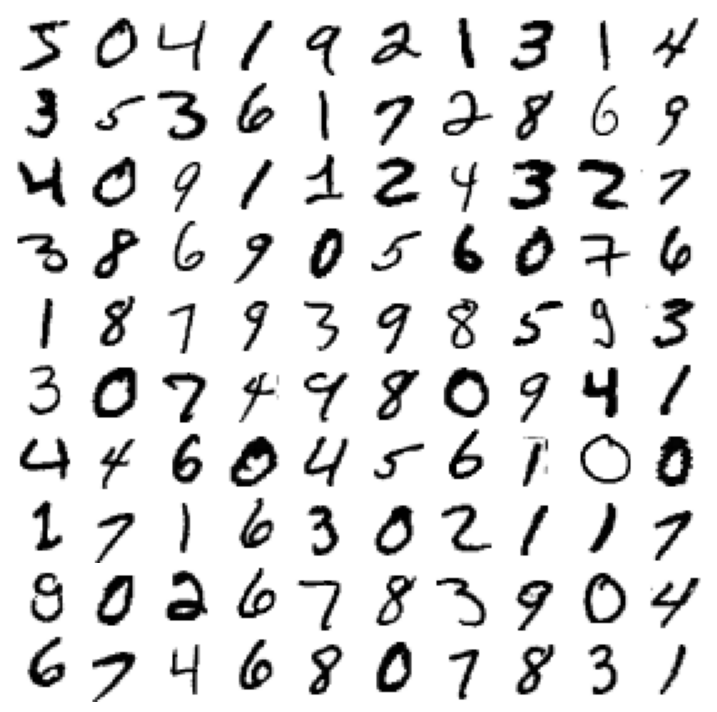

In [ ]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Classification Problem




## Training a Binary Classifier

In [ ]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [ ]:
#from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

### Measuring Accuracy Using Cross-Validation

In [ ]:
#from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
#from sklearn.model_selection import StratifiedKFold
#from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [ ]:
#from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

### Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

### Precision and Recall

In [ ]:
#from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [ ]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

np.float64(0.8370879772350012)

In [ ]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.6511713705958311

In [ ]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

np.float64(0.6511713705958311)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [ ]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

np.float64(0.7325171197343847)

### Precision/Recall Trade-off

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_some_digit_pred

array([ True])

In [ ]:
# extra code – just shows that y_scores > 0 produces the same result as
#              calling predict()
y_scores > 0

array([ True])

In [ ]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

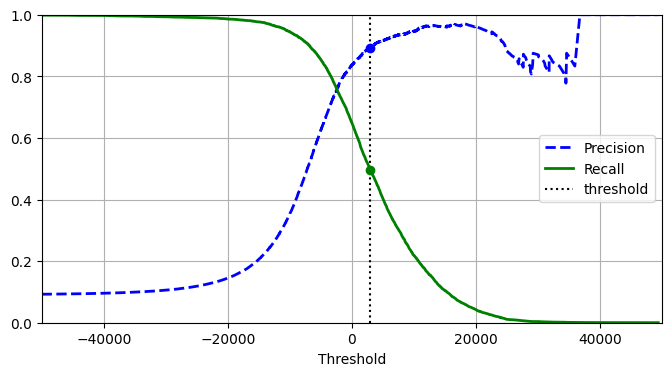

In [ ]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")


plt.show()

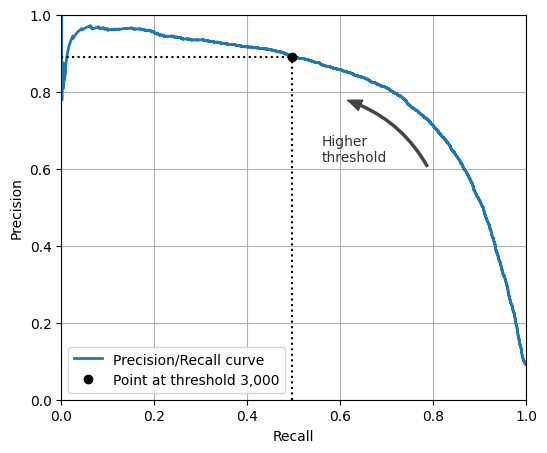

In [ ]:
#import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")


plt.show()

In [ ]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.0194991439557)

In [ ]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

### The ROC Curve

In [ ]:
#from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

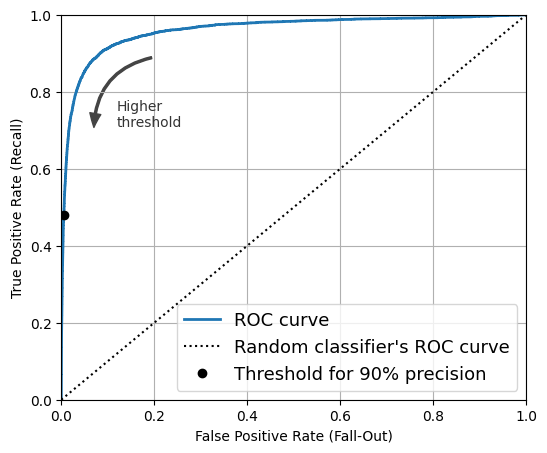

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)


plt.show()

In [ ]:
#from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

**Warning:** the following cell may take a few minutes to run.

Because the code takes several minutes to run, it has been commented out. You can remove the comment symbols (#) and re-run the code, if you wish.

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

#forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
#y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 #                                   method="predict_proba")

In [ ]:
#y_probas_forest[:2]

These are _estimated probabilities_. Among the images that the model classified as positive with a probability between 50% and 60%, there are actually about 94% positive images:

In [ ]:
# Not in the code
#idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
#print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

In [ ]:
#y_scores_forest = y_probas_forest[:, 1]
#precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    #y_train_5, y_scores_forest)

In [ ]:
#plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

#plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         #label="Random Forest")
#plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
#plt.xlabel("Recall")
#plt.ylabel("Precision")
#plt.axis([0, 1, 0, 1])
#plt.grid()
#plt.legend(loc="lower left")

#plt.show()

We could use `cross_val_predict(forest_clf, X_train, y_train_5, cv=3)` to compute `y_train_pred_forest`, but since we already have the estimated probabilities, we can just use the default threshold of 50% probability to get the same predictions much faster:

In [ ]:
#y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
#f1_score(y_train_5, y_train_pred_forest)

In [ ]:
#roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
#precision_score(y_train_5, y_train_pred_forest)

In [ ]:
#recall_score(y_train_5, y_train_pred_forest)

## Multiclass Classification

SVMs do not scale well to large datasets, so let's only train on the first 2,000 instances, or else this section will take a very long time to run.

Even with this reduction in the sample size, the code takes several minutes to run. So, it has been commented out. You can remove the comment symbols (#) and re-run the code, if you wish.

In [ ]:
#from sklearn.svm import SVC

#svm_clf = SVC(random_state=42)
#svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5

In [ ]:
#svm_clf.predict([some_digit])

In [ ]:
#some_digit_scores = svm_clf.decision_function([some_digit])
#some_digit_scores.round(2)

In [ ]:
#class_id = some_digit_scores.argmax()
#class_id

In [ ]:
#svm_clf.classes_

In [ ]:
#vm_clf.classes_[class_id]

If you want `decision_function()` to return all 45 scores, you can set the `decision_function_shape` hyperparameter to `"ovo"`. The default value is `"ovr"`, but don't let this confuse you: `SVC` always uses OvO for training. This hyperparameter only affects whether or not the 45 scores get aggregated or not:

In [ ]:
# extra code – shows how to get all 45 OvO scores if needed
#svm_clf.decision_function_shape = "ovo"
#some_digit_scores_ovo = svm_clf.decision_function([some_digit])
#some_digit_scores_ovo.round(2)

In [ ]:
#from sklearn.multiclass import OneVsRestClassifier

#ovr_clf = OneVsRestClassifier(SVC(random_state=42))
#ovr_clf.fit(X_train[:2000], y_train[:2000])

In [ ]:
#ovr_clf.predict([some_digit])

In [ ]:
#len(ovr_clf.estimators_)

In [ ]:
#sgd_clf = SGDClassifier(random_state=42)
#sgd_clf.fit(X_train, y_train)
#sgd_clf.predict([some_digit])

In [ ]:
#sgd_clf.decision_function([some_digit]).round()

**Warning:** the following two cells may take a few minutes each to run:

In [ ]:
#cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
#cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

#  MNIST Neural Net Classification

Here are the imports needed for this section.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical

Let's reload the data from the keras datasets library.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

And just check to make sure that it came in properly.

2


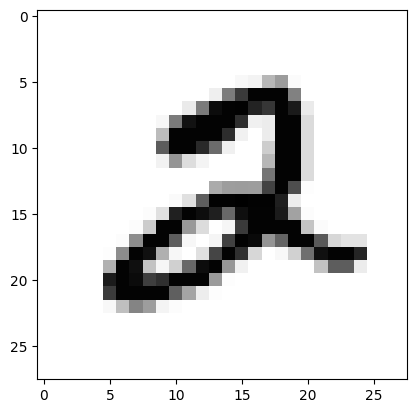

In [ ]:
image_index = 5
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

## Traditional Feed Forward Neural Network

In [ ]:
np.random.seed(42)

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

To fit the conventional feed-forward neural net, we need to reformat the data.

In [ ]:
x_train_trad = x_train.reshape(x_train.shape[0], 784)
x_test_trad = x_test.reshape(x_test.shape[0], 784)

x_train_trad = x_train_trad / 255
x_test_trad = x_test_trad/ 255

We use the soft-max function as the output layer for this multi-class problem and we use 'categorical_crossentropy' as the (multi-class) loss function.

In [ ]:
model = Sequential()
model.add(Dense(50, input_shape=(784, ), activation='relu', name='dense_1'))
model.add(Dense(25, activation='relu', name='dense_2'))
model.add(Dense(10, activation='softmax', name='dense_output'))
# Compile model with:
    # - loss function: categorical cross-entropy
    # - optimizer: adam
    # - metrics recorded: accuracy
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,785 (159.32 KB)

 Trainable params: 40,785 (159.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
%%time
history = model.fit(x_train_trad, y_train,
                    epochs=20,
                    validation_data=(x_test_trad, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8417 - loss: 0.5414 - val_accuracy: 0.9461 - val_loss: 0.1748
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9542 - loss: 0.1562 - val_accuracy: 0.9616 - val_loss: 0.1268
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9664 - loss: 0.1109 - val_accuracy: 0.9593 - val_loss: 0.1323
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9731 - loss: 0.0894 - val_accuracy: 0.9689 - val_loss: 0.1055
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9770 - loss: 0.0726 - val_accuracy: 0.9674 - val_loss: 0.1105
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9798 - loss: 0.0620 - val_accuracy: 0.9681 - val_loss: 0.1086
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9837 - loss: 0.0519 - val_accuracy: 0.9705 - val_loss: 0.0970
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9845 - loss: 0.0473 - 

In [ ]:
last_accuracy = history.history['accuracy'][-1]
print(f"Final training accuracy: {last_accuracy:.4f}")
last_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final validation accuracy: {last_val_accuracy:.4f}")


Final training accuracy: 0.9945
Final validation accuracy: 0.9705


## Convolution Neural Network Fit

In [ ]:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(24, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 9, 9, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1296)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 24)             │        31,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,570 (178.01 KB)

 Trainable params: 45,570 (178.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
%%time
history = model.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8577 - loss: 0.5521 - val_accuracy: 0.9745 - val_loss: 0.0803
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9792 - loss: 0.0683 - val_accuracy: 0.9829 - val_loss: 0.0510
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9853 - loss: 0.0502 - val_accuracy: 0.9841 - val_loss: 0.0505
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9877 - loss: 0.0404 - val_accuracy: 0.9837 - val_loss: 0.0523
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9893 - loss: 0.0327 - val_accuracy: 0.9873 - val_loss: 0.0420
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9921 - loss: 0.0250 - val_accuracy: 0.9868 - val_loss: 0.0498
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9918 - loss: 0.0248 - val_accuracy: 0.9840 - val_loss: 0.0515
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9935 -

In [ ]:
last_accuracy = history.history['accuracy'][-1]
print(f"Final training accuracy: {last_accuracy:.4f}")
last_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final validation accuracy: {last_val_accuracy:.4f}")

Final training accuracy: 0.9964
Final validation accuracy: 0.9852


In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']

df2 = pd.DataFrame({"accuracy":accuracy, "loss":loss, "time-step": np.arange(0, len(accuracy))})

base = alt.Chart(df2).mark_line(color="blue").encode(x="time-step", y="accuracy")
loss = alt.Chart(df2).mark_line(color="red").encode(x="time-step", y="loss")
(base  + loss).properties(title='Chart 4')

alt.LayerChart(...)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


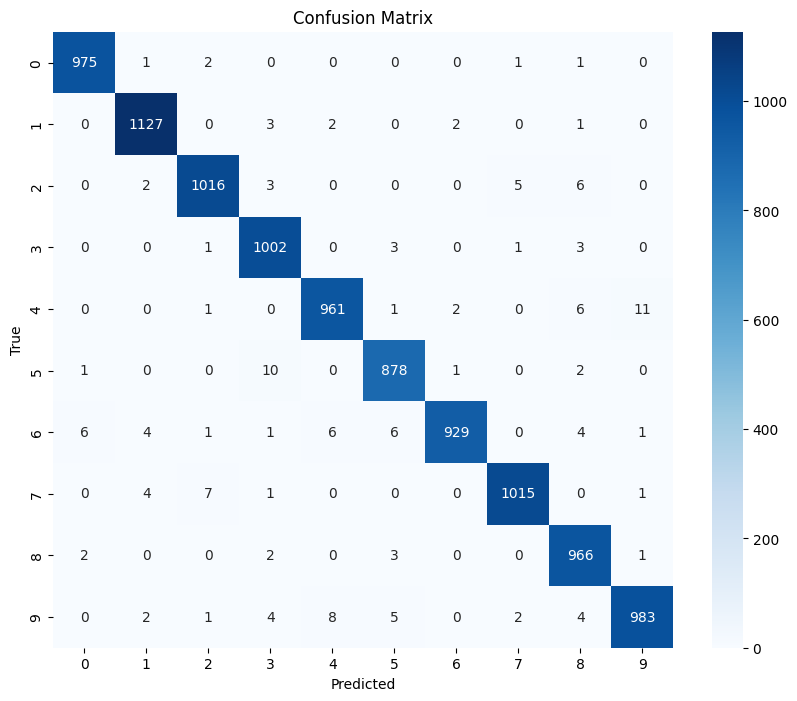

In [ ]:

y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred, labels=list(range(num_classes)))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=list(range(num_classes)), yticklabels=list(range(num_classes)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()